In [1]:
from astroquery.mpc import MPC
import numpy as np
import pandas as pd
%matplotlib inline

In [124]:
'''N=int(input('cantidad de objetos a buscar: '))
Objs=[]
for i in range(N):
    msj='ingrese ID del objeto '+ str(i+1)+':'
    n=int(input(msj))
    Objs.append(n)'''
Objs=[20674,140429,177075,249738,257134,321490,341222,496996]    
#Data frame vacio para añadir la información de cada objeto
tabla=pd.DataFrame()
re="number,epoch,semimajor_axis,eccentricity,inclination,argument_of_perihelion,ascending_node,perihelion_distance,absolute_magnitude,period,observations,mean_anomaly"

#Ciclo para descargar los datos de cada objeto
for e in Objs:
    res = MPC.query_object('asteroid',number=e,return_fields=re)
    df=pd.DataFrame(res)
    df=df[['number','epoch','semimajor_axis','eccentricity','inclination','argument_of_perihelion','ascending_node','perihelion_distance','mean_anomaly','absolute_magnitude','period','observations']]
    Df=df.set_axis(['id','Epoca','a','e','i','ω','Ω','q','M','Mag','Periodo','# obs'],axis=1)
    Df[['a','e','i','ω','Ω','q','M','Mag','Periodo']]=Df[['a','e','i','ω','Ω','q','M','Mag','Periodo']].astype(float)
    tabla=pd.concat([tabla, Df], axis=0,ignore_index=True)
tabla

,id,Epoca,a,e,i,ω,Ω,q,M,Mag,Periodo,# obs
0,20674,2022-01-21.0,3.00550,0.037957,9.95009,204.24229,204.442243,2.891424,101.72757,12.83,5.21,2369
1,140429,2022-01-21.0,3.00693,0.054449,9.59285,158.45536,226.870295,2.843208,327.38049,15.18,5.21,572
2,177075,2022-01-21.0,3.00340,0.019939,10.33255,215.06986,184.599979,2.943514,6.36360,15.78,5.20,400
3,249738,2022-01-21.0,3.00319,0.023958,10.22930,214.39792,189.598656,2.931244,7.02327,15.93,5.20,377
4,257134,2022-01-21.0,3.00445,0.018107,10.36565,223.04383,182.495765,2.950045,43.04588,15.89,5.21,276
5,321490,2022-01-21.0,3.00600,0.019281,10.36122,229.74797,182.417637,2.948043,77.05765,15.99,5.21,262
6,341222,2020-12-17.0,3.00331,0.030074,10.27986,225.84165,187.378110,2.912987,142.44893,15.73,5.20,354
7,496996,2020-05-31.0,3.00463,0.023893,10.36545,228.81826,182.950574,2.932845,95.21545,17.00,5.21,48


In [125]:
tabla.to_excel(r'C:\Users\Daniel Guzmán\Documents\Tesis Final\Programa\Elementos Orbitales.xlsx',index = False, header=True)

Ecuación para determinar el valor de la anomalía verdadera $\nu$ a partir de la anomalía media $M$ y la eccentricidad $e$

$$\nu=M+\left(2 e-\frac{1}{4} e^{3}\right) \sin M+\frac{5}{4} e^{2} \sin 2 M+\frac{13}{12} e^{3} \sin 3 M+\mathrm{O}\left(e^{4}\right)$$

el último termino de la ecuación anterior se usa para decir que la ecuación no tiene en cuenta los terminos con $e^{4}$ y mayores

In [128]:
tabla['v']=tabla['M']+(2*tabla['e']-(tabla['e']**3)/4)*np.sin(tabla['M'])+((5/4)*(tabla['e']**2)*np.sin(2*tabla['M']))+((13/12)*(tabla['e']**3)*np.sin(3*tabla['M']))
tabla

,id,Epoca,a,e,i,ω,Ω,q,M,Mag,Periodo,# obs,v
0,20674,2022-01-21.0,3.00550,0.037957,9.95009,204.24229,204.442243,2.891424,101.72757,12.83,5.21,2369,101.799419
1,140429,2022-01-21.0,3.00693,0.054449,9.59285,158.45536,226.870295,2.843208,327.38049,15.18,5.21,572,327.450531
2,177075,2022-01-21.0,3.00340,0.019939,10.33255,215.06986,184.599979,2.943514,6.36360,15.78,5.20,400,6.366885
3,249738,2022-01-21.0,3.00319,0.023958,10.22930,214.39792,189.598656,2.931244,7.02327,15.93,5.20,377,7.056306
4,257134,2022-01-21.0,3.00445,0.018107,10.36565,223.04383,182.495765,2.950045,43.04588,15.89,5.21,276,43.016319
5,321490,2022-01-21.0,3.00600,0.019281,10.36122,229.74797,182.417637,2.948043,77.05765,15.99,5.21,262,77.095970
6,341222,2020-12-17.0,3.00331,0.030074,10.27986,225.84165,187.378110,2.912987,142.44893,15.73,5.20,354,142.396912
7,496996,2020-05-31.0,3.00463,0.023893,10.36545,228.81826,182.950574,2.932845,95.21545,17.00,5.21,48,95.255472


In [2]:
from astropy import units as u
from poliastro.plotting import OrbitPlotter2D
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import StaticOrbitPlotter
from poliastro.frames import Planes
from poliastro.plotting import OrbitPlotter3D
from poliastro.constants import J2000

In [3]:
# Data for Mars at J2000 from JPL HORIZONS
a = 3.0069332 * u.AU
ecc = 0.0544491 * u.one
inc = 9.59285 * u.deg
raan = 226.87030 * u.deg
argp = 158.45536 * u.deg
nu = -32.55 * u.deg

orb1 = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)

In [4]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
orb1.plot(interactive=True, use_3d=True)

In [5]:
a = Orbit.from_sbdb("140429")
b = Orbit.from_sbdb("20674")
c = Orbit.from_sbdb("177075")
op = OrbitPlotter2D()
op.plot(a, label="140429")
op.plot(b, label="20674")
op.plot(c, label="177075")

In [6]:
a.nu.to(u.deg)

<Quantity -36.18462014 deg>

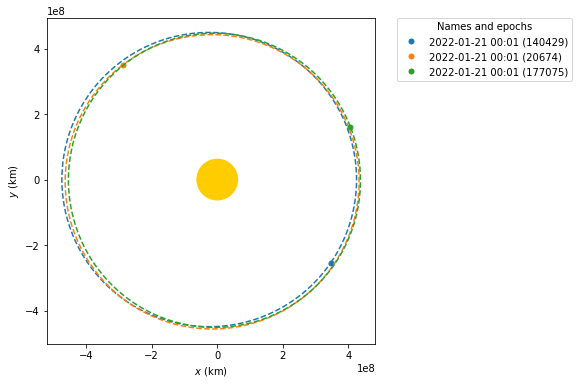

In [7]:
frame = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
frame.plot(a, label="140429")
frame.plot(b, label="20674")
frame.plot(c, label="177075");

In [8]:
frame = OrbitPlotter3D()

frame.plot(a)
frame.plot(b)
frame.plot(c)
frame.plot_body_orbit(Earth, J2000)